# **History of Neural Networks [Hands On]**

## 1.1 Perceptron Example

In [1]:
import numpy as np
from matplotlib.pyplot import *

In [2]:
#Some training data for us to play with
X = np.array([[4, 1],
              [1, 2],
              [5, 1],
              [3, 2],
              [5, 2],
              [4, 3]])

#Labels
y = np.array([1, 0, 1, 0, 1, 0])

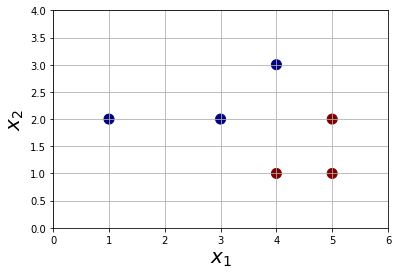

In [3]:
scatter(X[:,0], X[:,1], c = y, s = 100, cmap='jet')
xlabel('$x_1$', fontsize = 20)
ylabel('$x_2$', fontsize = 20)
xlim([0, 6]); ylim([0, 4])
grid(1)

In [4]:
#Careful, just run this once!
X = np.hstack((X, np.ones((X.shape[0], 1))))

In [5]:
X

array([[4., 1., 1.],
       [1., 2., 1.],
       [5., 1., 1.],
       [3., 2., 1.],
       [5., 2., 1.],
       [4., 3., 1.]])

In [6]:
def neuron(x, w):
    '''Simple McCulloch-Pitts Neuron model, x and w and are numpy arrays of the same shape'''
    return np.dot(x, w) > 0

In [7]:
def update_nueron(w, x, label):
    '''Update McCulloch + Pitts Nueron using Rosenblatt's Perceptron Algorithms
       w = neuron weights, x = (n dimensional numpy array example), label = binary label'''
    
    if neuron(x, w) == 0 and label == 1:
        w = w + x
        print('incorrect!, New weights = ' + str(w))

    elif neuron(x, w) == 1 and label == 0:
        w = w - x
        print('incorrect!, New weights = ' + str(w))

    else:
        print('correct!')  
    
    return w

In [8]:
def plot_decision_boundary(X, y, w, i):
    x1s = np.arange(7)
    x2s = (-w[2]-w[0]*x1s)/w[1]

    fig = figure(0, (12,8))
    scatter(X[:,0], X[:,1], c = y, s = 75) #Scatter data
    scatter(X[i,0], X[i,1], c = 'r', s = 75)
    plot(x1s, x2s)#Plot decision boundary

    xlabel('$x_1$', fontsize = 20)
    ylabel('$x_2$', fontsize = 20)
    grid(1)

In [9]:
#Initialize Weights to zero:
w = np.zeros(3)

#Start on 0th example:
i = 0

incorrect!, New weights = [4. 1. 1.]


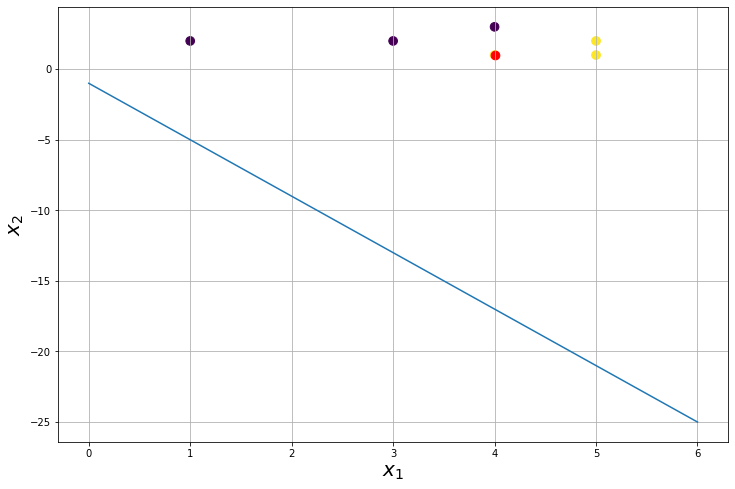

In [10]:
#Run this cell multiple times to iterate through perceptron algorithm.
w = update_nueron(w, X[i, :], y[i])

#plot decision boundary and examples
plot_decision_boundary(X, y, w, i)

#Increment counter, startover when we reach the end of examples
i = (i+1)%X.shape[0] 

## 1.2 [Interactive] Can You Create a Dataset (X,y) that the perceptron cannot learn?

In [62]:
#Data for you to manipulate:
X = np.array([[4, 1],
              [1, 2],
              [5, 1],
              [3, 2],
              [5, 2],
              [4, 3]])

y = np.array([1, 0, 1, 0, 1, 0])

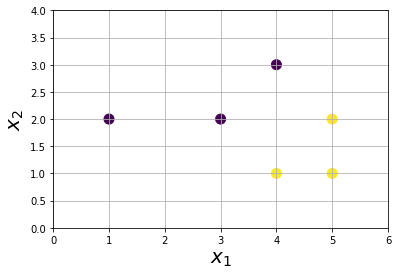

In [63]:
scatter(X[:,0], X[:,1], c = y, s = 100)
xlabel('$x_1$', fontsize = 20)
ylabel('$x_2$', fontsize = 20)
xlim([0, 6]); ylim([0, 4]); grid(1)

In [64]:
w = np.zeros(3) #Initialize Weights to zero:
i = 0 #Start on 0th example:
X = np.hstack((X, np.ones((X.shape[0], 1))))

incorrect!, New weights = [4. 1. 1.]


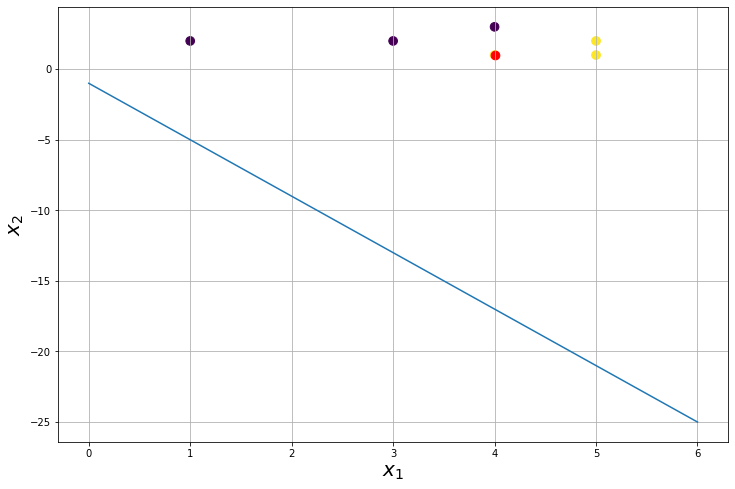

In [65]:
#Run this cell multiple times to iterate through perceptron algorithm.
w = update_nueron(w, X[i, :], y[i])

#plot decision boundary and examples
plot_decision_boundary(X, y, w, i)

#Increment counter, startover when we reach the end of examples
i = (i+1)%X.shape[0] 

## 2. Small Convolutional Neural Network in Pytorch

- Make sure that this code works for you!

In [11]:
import numpy as np
from matplotlib.pyplot import *
import torch, torchvision
import torch.nn as nn

In [12]:
#Check if we have a GPU:
if torch.cuda.is_available(): device = torch.device('cuda')
else: device = torch.device('cpu')

In [13]:
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('../data', train=True, download=True, \
                               transform = torchvision.transforms.ToTensor()),
    batch_size=64, shuffle=True)

In [14]:
x, y = next(iter(train_loader))

In [15]:
x.shape, y.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

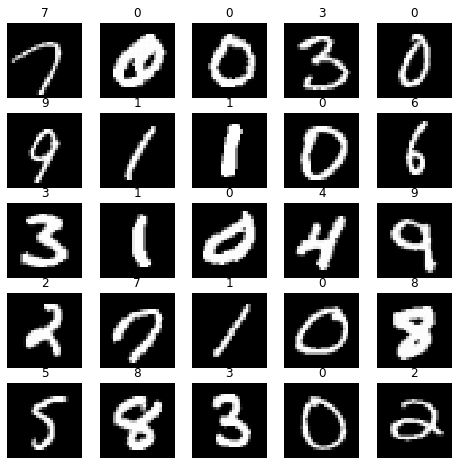

In [16]:
fig = figure(0, (8, 8))
for i in range(25):
    fig.add_subplot(5,5,i+1)
    imshow(x[i, 0, :, :].numpy(), cmap = 'gray'); axis('off')
    title(y.numpy()[i])

In [23]:
class Net(nn.Module):
    '''Le-Net 5 implementation'''
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(400, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.max_pool2d(torch.tanh(self.conv1(x)), (2, 2))
        x = torch.max_pool2d(torch.tanh(self.conv2(x)), (2,2))
        x = x.view(-1, self.num_flat_features(x))
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [24]:
N = Net().to(device) #Put on the GPU if we have one

In [25]:
#Setup loss function and optimizer
import torch.optim as optim
optimizer = torch.optim.SGD(N.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [26]:
print_freq = 100
num_epochs = 5

for epoch in range(num_epochs):
    for i, (x, y) in enumerate(train_loader):
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad() # zero the parameter gradients
        yhat = N(x) #Forward pass
        loss = criterion(yhat, y) #Compute loss
        loss.backward() #Backpropogation in one line!
        optimizer.step() #Take step "down hill"

        if i%print_freq == 0:
            yhat = N(x)
            _, predictions = torch.max(yhat, dim =1)
            acc = y.eq(predictions).sum(dtype = torch.float)/len(predictions)
            print('epoch=', str(epoch), ', loss=', loss.data.detach().cpu().numpy(), 'accuracy=', acc.cpu().detach().numpy())

epoch= 0 , loss= 2.2985559 accuracy= 0.15625
epoch= 0 , loss= 2.304214 accuracy= 0.109375
epoch= 0 , loss= 2.288803 accuracy= 0.140625
epoch= 0 , loss= 2.2802763 accuracy= 0.265625
epoch= 0 , loss= 2.2674298 accuracy= 0.28125
epoch= 0 , loss= 2.231048 accuracy= 0.5625
epoch= 0 , loss= 2.1943755 accuracy= 0.515625
epoch= 0 , loss= 2.096269 accuracy= 0.640625
epoch= 0 , loss= 1.8841996 accuracy= 0.640625
epoch= 0 , loss= 1.4904767 accuracy= 0.640625
epoch= 1 , loss= 1.4120136 accuracy= 0.578125
epoch= 1 , loss= 1.2352371 accuracy= 0.6875
epoch= 1 , loss= 1.1250094 accuracy= 0.640625
epoch= 1 , loss= 0.834652 accuracy= 0.796875
epoch= 1 , loss= 0.778754 accuracy= 0.765625
epoch= 1 , loss= 0.6288616 accuracy= 0.859375
epoch= 1 , loss= 0.5544432 accuracy= 0.859375
epoch= 1 , loss= 0.62105536 accuracy= 0.828125
epoch= 1 , loss= 0.5657355 accuracy= 0.8125
epoch= 1 , loss= 0.41210163 accuracy= 0.859375
epoch= 2 , loss= 0.52813035 accuracy= 0.890625
epoch= 2 , loss= 0.48608577 accuracy= 0.875
e

KeyboardInterrupt: 

![](../graphics/spacer_small.png)

## 3. ResNet in fastai

- Make sure that this code works for you!

In [28]:
from fastai.vision import *

In [29]:
#Download our data if we don't have it:
path = untar_data(URLs.DOGS)

sz = 224
tfms = get_transforms()
data = ImageDataBunch.from_folder(path, size = sz, ds_tfms = tfms)

In [30]:
data

ImageDataBunch;

Train: LabelList (23000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dogs,dogs,dogs,dogs,dogs
Path: /Users/stephenwelch/.fastai/data/dogscats;

Valid: LabelList (2000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dogs,dogs,dogs,dogs,dogs
Path: /Users/stephenwelch/.fastai/data/dogscats;

Test: None

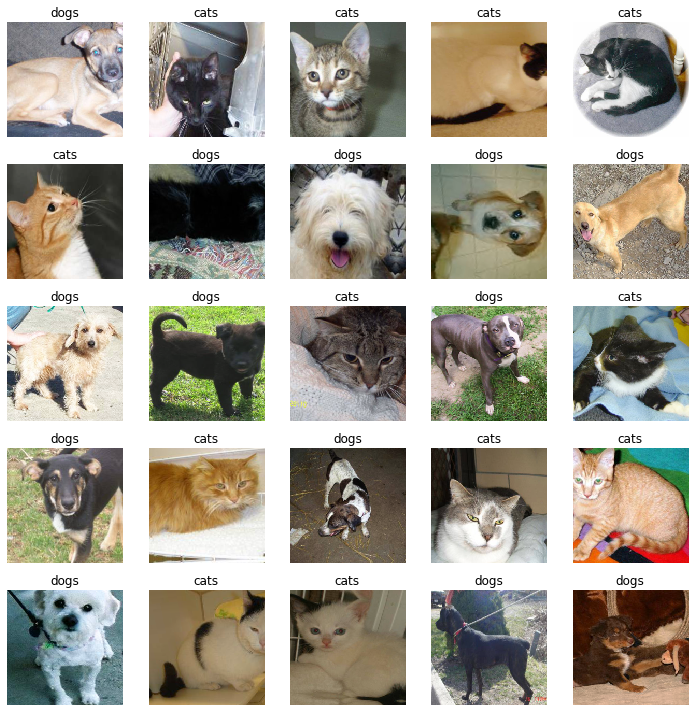

In [31]:
#fast ai has some nice built in visualization methods:
data.show_batch(rows = 5, figsize = (10, 10))

In [32]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy, pretrained = True)

In [33]:
# Takes a couple hours to train on CPU, just a few minutes on GPU 
#learn.fit(epochs = 2, lr = 1e-2)

In [34]:
#learn.fit_one_cycle(cyc_len = 4, max_lr = 1e-2)

- This is pretty slow on CPU, you can download my pretrained model [here](http://www.welchlabs.io/unccv/intro_to_computer_vision/dogs_vs_cats.pth), just put the pth in the data directory of this repo.

In [ ]:
#If we don't want to take the time to train here , we can load saved model weights from data directory
learn.model_dir = Path(os.getcwd().split('notebooks')[0])/'data'
learn.load('dogs_vs_cats');

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix(figsize = (6, 6))

In [ ]:
cm = interp.confusion_matrix()
accuracy = np.sum(np.diag(cm))/np.sum(cm)
print(accuracy)